In [1]:
import pandas as pd 

# Nova seção

In [3]:
# importção das planilhas
df1 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Salvador.xlsx")

In [4]:
# concatenando as planilhas
df = pd.concat([df1, df2, df3, df4, df5])

In [5]:
# coletantum amostra do df
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
177,Salvador,2019-01-02,41.19,1037,2
37,Salvador,2019-01-01,18.31,1036,3
97,Salvador,2019-01-01,39.91,1037,3
2,Salvador,2019-02-10,173.59,1035,3
237,Salvador,2019-01-03,38.06,1036,3


In [6]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [7]:
#alterando o tipo de dados em uma coluna
df["LojaID"] = df["LojaID"].astype("object")

In [8]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [9]:
#consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [11]:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [ ]:
#Substituido os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [ ]:
#Deletando as linhas com valores nulos 
df.dropna(inplace=True)

In [ ]:
#Deletando as linhas com valores nulos com base em apenas 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

In [12]:
#Criando uma nova coluna 
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [13]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [14]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [15]:
#Retornado a menor receita
df["Receita"].min()

3.34

In [16]:
#Retornando as linhas com maiores valores
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [17]:
#Retornando as linhas com os menores valores
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [18]:
#Grupamento 
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [19]:
#Ordenando o conjunto de dados 
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


Trabalhando com datas 


In [20]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [22]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [23]:
#Transformando a coluna de data em data 
df["Data"] = pd.to_datetime(df["Data"])

In [24]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [25]:
#Agrupando por ano 
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [26]:
#Criando uma nova coluna com o ano 
df["Ano_Venda"] = df["Data"].dt.year 

In [27]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
23,Aracaju,2018-01-01,237.50,1523,7,1662.50,2018
51,Natal,2018-01-21,859.00,852,4,3436.00,2018
216,Natal,2019-01-02,5.82,1035,1,5.82,2019
57,Salvador,2019-01-01,11.72,1035,1,11.72,2019
78,Recife,2019-01-01,238.73,980,3,716.19,2019


In [28]:
#Extraido o mês e o dia
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [30]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda
186,Natal,2019-01-02,169.09,1036,2,338.18,2019,1,2
74,Fortaleza,2019-01-01,163.09,1005,5,815.45,2019,1,1
180,Natal,2019-01-02,116.63,1035,2,233.26,2019,1,2
203,Natal,2019-01-02,37.75,1035,2,75.50,2019,1,2
60,Salvador,2019-01-01,96.01,1034,2,192.02,2019,1,1


In [31]:
#Retornando a data mais antiga 
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [33]:
#Calculando a diferença de dias 
df["Diferenca_Dias"] = df["Data"] - df["Data"].min()

In [35]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias
6,Aracaju,2018-01-01,35.50,1522,2,71.00,2018,1,1,0 days
30,Aracaju,2018-01-01,119.21,1520,8,953.68,2018,1,1,0 days
74,Salvador,2019-01-01,170.53,1035,2,341.06,2019,1,1,365 days
73,Salvador,2019-01-01,8.39,1037,1,8.39,2019,1,1,365 days
38,Aracaju,2018-01-01,142.46,1520,1,142.46,2018,1,1,0 days


In [36]:
#Criando a coluna de trimestre
df["Trimestre_vendas"] = df["Data"].dt.quarter

In [37]:
#Filtrando as venda de 2019 do mês de março 
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [38]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_vendas
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


Visualizando Dados

In [39]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

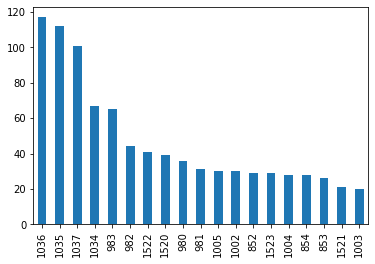

In [40]:
df["LojaID"].value_counts(ascending=False).plot.bar()

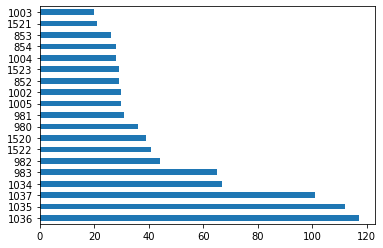

In [41]:
df["LojaID"].value_counts(ascending=False).plot.barh()

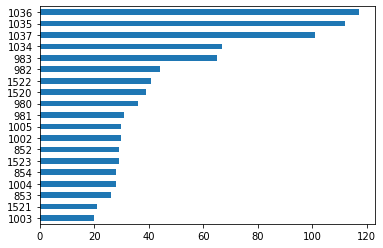

In [43]:
df["LojaID"].value_counts(ascending=True).plot.barh();

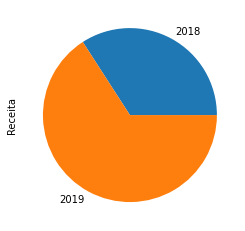

In [45]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [46]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

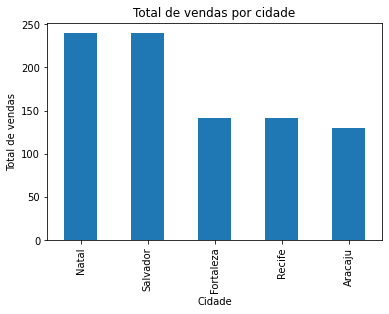

In [48]:
#Adicionando um titulo e alterando o nome do eixos 
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

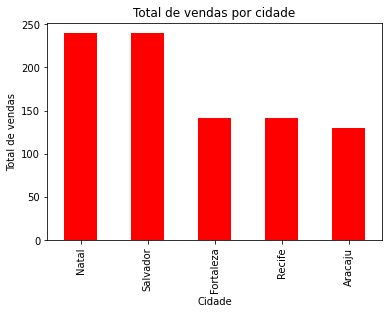

In [49]:
#Alterando a cor 
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color= "red")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

In [50]:
#alterando o estilo do gráfico
plt.style.use("ggplot")

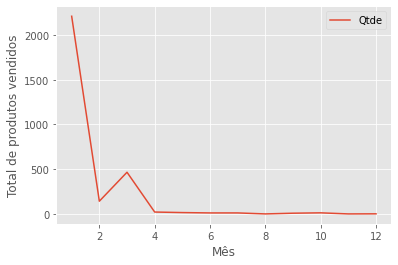

In [51]:
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot(title= "Total de Produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();

In [53]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

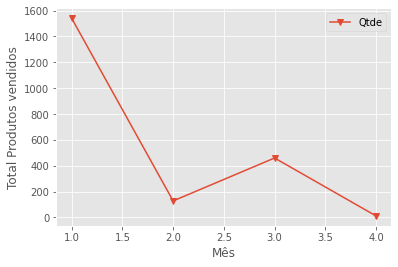

In [56]:
#Total de produtos vendidos pro mês 
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos")
plt.legend();

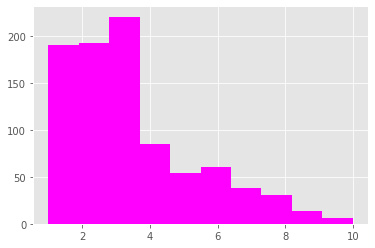

In [58]:
#Histograma
plt.hist(df["Qtde"], color= "magenta");

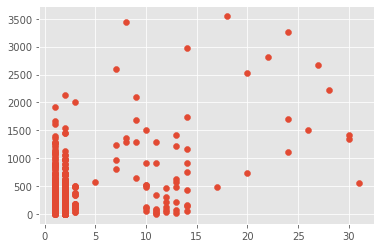

In [60]:
plt.scatter(x=df_2019["Dia_Venda"], y=df_2019["Receita"]);

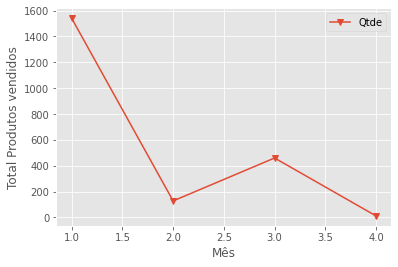

In [61]:
#Salvando as png
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos")
plt.legend();
plt.savefig("grafico Qtde x Mes.png")